# Filtering Cells in a MIBI-TOF Dataset

This notebook demonstrates how to apply cell filtering to a real-world dataset from Molecular Cartography (SPArrOW output). We will download the data, load it as a `SpatialData` object, and then use `squidpy.pp.filter_cells` to remove cells based on specific criteria.

The primary goal is to showcase a practical application of the filtering function on a dataset with multiple fields of view (coordinate systems). We will visualize the data both before and after filtering, comparing the results for different regions of interest within the dataset to highlight the effects of the `filter_cells` operation.

## Downloading the dataset

```
!wget https://s3.embl.de/spatialdata/spatialdata-sandbox/mouse_liver.zip
!unzip mouse_liver.zip
!mv data.zarr mouse_liver.zarr
```

## Dataset References

- Pollaris, Lotte, et al. “SPArrOW: a flexible, interactive and scalable pipeline for spatial transcriptomics analysis.” bioRxiv (2024) doi:10.1101/2024.07.04.601829

In [1]:
import matplotlib.pyplot as plt
import spatialdata as sd
import spatialdata_plot as _

import squidpy as sq

/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [2]:
mouse_liver_sdata = sd.read_zarr("mouse_liver.zarr")
mouse_liver_sdata

/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


SpatialData object, with associated Zarr store: /Users/selman/projects/squidpy/docs/notebooks/examples/preprocessing/mouse_liver.zarr
├── Images
│     └── 'raw_image': DataTree[cyx] (1, 6432, 6432), (1, 1608, 1608)
├── Labels
│     └── 'segmentation_mask': DataArray[yx] (6432, 6432)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 3) (2D points)
├── Shapes
│     └── 'nucleus_boundaries': GeoDataFrame shape: (3375, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (3375, 99)
with coordinate systems:
    ▸ 'global', with elements:
        raw_image (Images), segmentation_mask (Labels), transcripts (Points), nucleus_boundaries (Shapes)

In [3]:
mouse_liver_sdata['table'].X.sum(axis=0)

matrix([[   828,    668,    531,    268,    211,   1686,    213,    279,
            230,      5,    177,    289,    138,   1490,    408,   2154,
            225,   1230,     25,    237,   3616,    557,     73,   2626,
           2500,     43,    270,   1070,  69599,   4420,    240,   1863,
            151,    197,     71,      5,   2383,  53837,     10,   2720,
          13679,    361,   3521,   3160,     18,      9,  11342,   1223,
           2256,    259,    321,    319,      7,    173,     70,    140,
            366,    581,   1626,    109,    153,    181,    972,    104,
            151,    766,     73,  10847,    313,     14, 126502,    359,
            565,   3732,   1953,   7838,   1292,    140,  10927,    304,
            276,   2218,   3503,   1428,    252,    392,   7172,   7241,
             78,     94,    233,     40,      1,    511,   1138,    161,
             52,     74,     71]], dtype=uint64)

In [6]:
mouse_liver_sdata_filtered = sq.pp.filter_cells(mouse_liver_sdata, min_counts=10, inplace=False)
mouse_liver_sdata_filtered

WARNING  Creating a deepcopy of the SpatialData object, depending on the size of the object this can take a while. 


/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:128: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:128: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:108: UserWarning: Key `nucleus_boundaries` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:118: UserWarning: Key `transcripts` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


SpatialData object
├── Images
│     └── 'raw_image': DataTree[cyx] (1, 6432, 6432), (1, 1608, 1608)
├── Labels
│     └── 'segmentation_mask': DataArray[yx] (6432, 6432)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 4) (2D points)
├── Shapes
│     └── 'nucleus_boundaries': GeoDataFrame shape: (3268, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (3268, 99)
with coordinate systems:
    ▸ 'global', with elements:
        raw_image (Images), segmentation_mask (Labels), transcripts (Points), nucleus_boundaries (Shapes)

/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:118: UserWarning: Key `transcripts` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/selman/miniforge3/envs/squidpy/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/selman/projects/spatialdata/src/spatialdata/_core/_elements.py:118: UserWarning: Key `transcripts` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


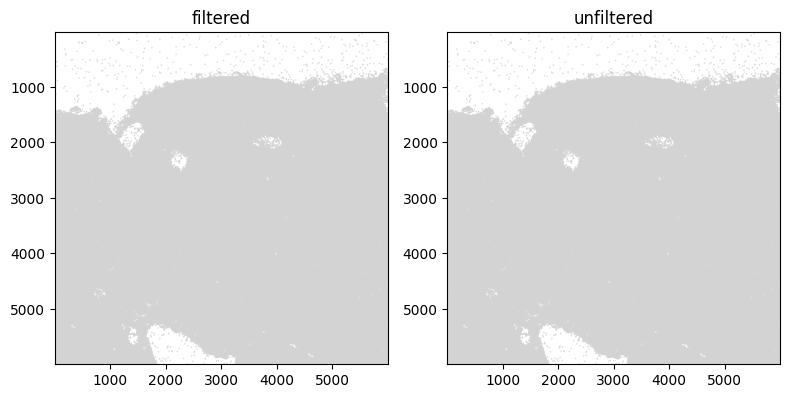

In [7]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))

mouse_liver_sdata_filtered.pl.render_points().pl.show(ax=axs[0], title="filtered")
mouse_liver_sdata.pl.render_points().pl.show(ax=axs[1], title="unfiltered")

plt.tight_layout()

